In [3]:
import pandas as pd, numpy as np,os
os.chdir('D:\\R Studio')
df=pd.read_csv('pizza_data.csv')

In [6]:
df.columns

Index(['brand', 'price', 'weight', 'crust', 'cheese', 'size', 'toppings',
       'spicy', 'ranking'],
      dtype='object')

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='ranking ~ C(brand,Sum)+C(price,Sum)+C(weight,Sum)+C(crust,Sum)+C(cheese,Sum)+C(size,Sum)+C(toppings,Sum)+C(spicy,Sum)'
model_fit=smf.ols(model,data=df).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Mon, 08 Jul 2024   Prob (F-statistic):             0.0794
Time:                        20:13:13   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

C:\Users\SAMPREETH\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
conjoint_attributes = ['brand','price','weight','crust','cheese','size','toppings','spicy']

In [10]:
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df[item])))
    level_name.append(list(np.unique(df[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)

brand
price
weight
crust
cheese
size
toppings
spicy
-------------------------------------------------------------
level name:
[['Dominos', 'Onesta', 'Oven Story', 'Pizza hut'], ['$1.00', '$2.00', '$3.00', '$4.00'], ['100g', '200g', '300g', '400g'], ['thick', 'thin'], ['Cheddar', 'Mozzarella'], ['large', 'regular'], ['mushroom', 'paneer'], ['extra', 'normal']]
npw with sum element:
[0.7499999999999996, -0.7499999999999996]
imp level:
{'brand': 3, 'price': 0, 'weight': 0, 'crust': 0, 'cheese': 1, 'size': 1, 'toppings': 0, 'spicy': 0}
part worth:
[[6.661338147750939e-16, 1.7763568394002505e-15, -0.2500000000000031, 0.25000000000000067], [0.7499999999999996, -5.995204332975845e-15, 6.661338147750939e-15, -0.7500000000000002], [5.000000000000004, 1.999999999999988, -1.2499999999999916, -5.750000000000002], [1.7500000000000004, -1.7500000000000004], [-0.25000000000000044, 0.25000000000000044], [-0.2500000000000006, 0.2500000000000006], [1.1249999999999996, -1.1249999999999996], [0.7499999999

In [11]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[2.38, 7.14, 51.19, 16.67, 2.38, 2.38, 10.71, 7.14]


In [12]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict

Attribute : brand
    Relative importance of attribute  2.38
    Level wise part worths: 
0
0
          Dominos:6.661338147750939e-16
0
1
          Onesta:1.7763568394002505e-15
0
2
          Oven Story:-0.2500000000000031
0
3
          Pizza hut:0.25000000000000067
Attribute : price
    Relative importance of attribute  7.14
    Level wise part worths: 
1
0
          $1.00:0.7499999999999996
1
1
          $2.00:-5.995204332975845e-15
1
2
          $3.00:6.661338147750939e-15
1
3
          $4.00:-0.7500000000000002
Attribute : weight
    Relative importance of attribute  51.19
    Level wise part worths: 
2
0
          100g:5.000000000000004
2
1
          200g:1.999999999999988
2
2
          300g:-1.2499999999999916
2
3
          400g:-5.750000000000002
Attribute : crust
    Relative importance of attribute  16.67
    Level wise part worths: 
3
0
          thick:1.7500000000000004
3
1
          thin:-1.7500000000000004
Attribute : cheese
    Relative importance of attribute  2.38
    L

{'Dominos': 6.661338147750939e-16,
 'Onesta': 1.7763568394002505e-15,
 'Oven Story': -0.2500000000000031,
 'Pizza hut': 0.25000000000000067,
 '$1.00': 0.7499999999999996,
 '$2.00': -5.995204332975845e-15,
 '$3.00': 6.661338147750939e-15,
 '$4.00': -0.7500000000000002,
 '100g': 5.000000000000004,
 '200g': 1.999999999999988,
 '300g': -1.2499999999999916,
 '400g': -5.750000000000002,
 'thick': 1.7500000000000004,
 'thin': -1.7500000000000004,
 'Cheddar': -0.25000000000000044,
 'Mozzarella': 0.25000000000000044,
 'large': -0.2500000000000006,
 'regular': 0.2500000000000006,
 'mushroom': 1.1249999999999996,
 'paneer': -1.1249999999999996,
 'extra': 0.7499999999999996,
 'normal': -0.7499999999999996}

Text(0, 0.5, 'Importance')

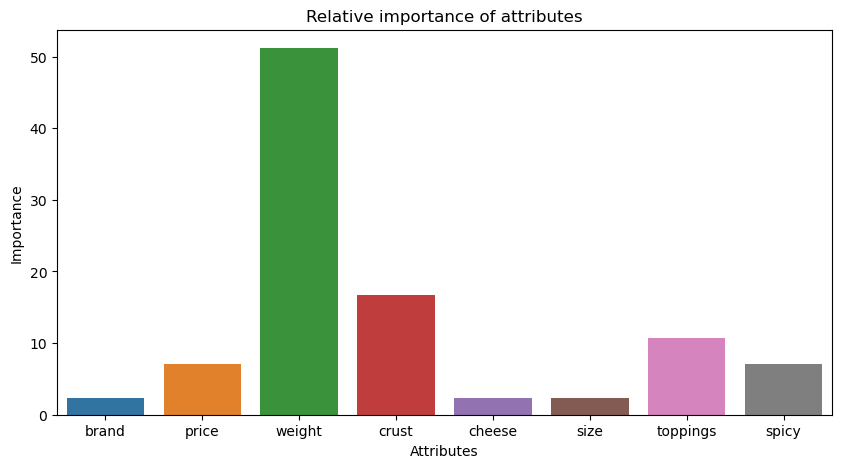

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [14]:
utility = []
for i in range(df.shape[0]):
    score = part_worth_dict[df['brand'][i]]+part_worth_dict[df['price'][i]]+part_worth_dict[df['weight'][i]]+part_worth_dict[df['crust'][i]]+part_worth_dict[df['cheese'][i]]+part_worth_dict[df['size'][i]]+part_worth_dict[df['toppings'][i]]+part_worth_dict[df['spicy'][i]]
    utility.append(score)
    
df['utility'] = utility
utility

[2.6250000000000053,
 3.37500000000001,
 0.37499999999999023,
 -6.375,
 -0.37499999999999734,
 4.3749999999999885,
 -1.374999999999982,
 -4.624999999999993,
 -3.625000000000007,
 7.625,
 -5.375000000000002,
 -2.3750000000000218,
 1.3750000000000058,
 6.375000000000002,
 -7.6249999999999964,
 5.624999999999995]

In [15]:
print("The profile that has the highest utility score :",'\n', df.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 brand       Oven Story
price            $4.00
weight            100g
crust            thick
cheese      Mozzarella
size             large
toppings      mushroom
spicy            extra
ranking             16
utility          7.625
Name: 9, dtype: object


In [16]:
for i,j in zip(attrib_level.keys(),range(0,len(conjoint_attributes))):
    #print(i)
    #level_name[j]
    print("Preferred level in {} is :: {}".format(i,level_name[j][important_levels[i]]))

Preferred level in brand is :: Pizza hut
Preferred level in price is :: $1.00
Preferred level in weight is :: 100g
Preferred level in crust is :: thick
Preferred level in cheese is :: Mozzarella
Preferred level in size is :: regular
Preferred level in toppings is :: mushroom
Preferred level in spicy is :: extra
